In [1]:
from platform import python_version
python_version()

'3.9.12'

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [4]:
tf.__version__

'2.9.1'

In [5]:
mnist?

Type:        module
String form: <module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\User\\miniconda3\\envs\\venv2\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>
File:        c:\users\user\miniconda3\envs\venv2\lib\site-packages\keras\api\_v2\keras\datasets\mnist\__init__.py
Docstring:   MNIST handwritten digits dataset.


In [6]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [7]:
X_train = X_train.reshape(60000, 28,28,1).astype('float32')
X_val= X_valid.reshape(10000, 28,28,1).astype('float32')

In [8]:
X_train /= .255
X_val /= .255

In [9]:
n_class = 10
y_train = to_categorical(y_train, n_class)
y_val = to_categorical(y_valid, n_class)

In [10]:
# network architecture

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape = (28,28,1)),
        tf.keras.layers.Conv2D(64,kernel_size= (3,3), activation = 'relu'),
        tf.keras.layers.MaxPool2D(pool_size = (2,2)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(n_class, activation = 'softmax')
    ]
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer= 'nadam', metrics = ['accuracy'])

In [13]:
history = model.fit(X_train, y_train, 
         batch_size = 128,
         epochs = 15, verbose= 1,
         validation_data = (X_val, y_val))

Epoch 1/15
469/469 [==============================] - 10s 18ms/step - loss: 2.0139 - accuracy: 0.6291 - val_loss: 0.2199 - val_accuracy: 0.9443
Epoch 2/15
469/469 [==============================] - 8s 17ms/step - loss: 0.4240 - accuracy: 0.8810 - val_loss: 0.1120 - val_accuracy: 0.9700
Epoch 3/15
469/469 [==============================] - 8s 17ms/step - loss: 0.2648 - accuracy: 0.9273 - val_loss: 0.0796 - val_accuracy: 0.9756
Epoch 4/15
469/469 [==============================] - 8s 17ms/step - loss: 0.1943 - accuracy: 0.9444 - val_loss: 0.0745 - val_accuracy: 0.9789
Epoch 5/15
469/469 [==============================] - 8s 17ms/step - loss: 0.1530 - accuracy: 0.9567 - val_loss: 0.0574 - val_accuracy: 0.9849
Epoch 6/15
469/469 [==============================] - 8s 17ms/step - loss: 0.1376 - accuracy: 0.9615 - val_loss: 0.0614 - val_accuracy: 0.9848
Epoch 7/15
469/469 [==============================] - 8s 17ms/step - loss: 0.1169 - accuracy: 0.9669 - val_loss: 0.0463 - val_accuracy: 0.987

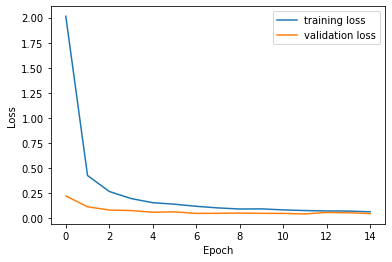

In [14]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()